<a href="https://colab.research.google.com/github/ArghyaPal/AI_Course_Tutorial/blob/master/Lesson_2_demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real world labeled data classification using Scikit-Learn SVM

Until now, you have learned about the theoretical background of SVM and studied SVM using a toy dataset. Now you will learn about its implementation in Python using scikit-learn.

In the model the building part, you will use the irisdataset, which is a very famous multi-class classification problem.


## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

## Load iris flower dataset
Iris flower dataset was originally introduce in 1936 by british statistician Ronald Fisher. The datset consists of Iris setosa, Iris versicolor and Iris virginica - three species of iris flower. <br>

---
### Iris Setosa: <br>
![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg) <br>


---


### Iris Versicolor: <br>
![Iris Versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg)


---

### Iris Virginica: <br>
![Iris Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

---



Four features were measured from each sample:
> * the length of sepals 
> * the width of sepals
> * the length of petals
> * the width of petals , all are in centimeters.
[Source: wikipedia]



### The overall view of iris dataset

1. Total number of samples: 150
2. Number of features of each sample: 4 (see above)
3. Number of classes: 3, setosa, virginica and versicolor
4. Data split
> * First 50 samples are from class setosa
> * Next 50 samples are virginica class
> * End 50 samples are versicolor class samples

In [2]:
from sklearn.datasets import load_iris
iris = load_iris() # Data loading

## Let's explore the data
One we are done with data loading, it's the time to see features and target

In [ ]:
print("Iris Data Features: ", iris.feature_names)
print("Iris Data Target:", iris.target_names)

Iris Data Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris Data Target: ['setosa' 'versicolor' 'virginica']


## Let's check first five elements of the iris dataset
We will use Pandas `DataFrame` to load the iris data in a tabular fashion. <br>

Pandas `DataFrame`is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. <br>

Pandas `DataFrame` consists of three principal components: <br>
> 1. Column
> 2. Row, and 
> 3. Data within each cell

In [ ]:
# Read the dataset, column names will be feature names, 
# i.e. sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
df = pd.DataFrame(iris.data,columns=iris.feature_names)

# Add labels as a column
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Exercise
> Go back and change the "target" value, i.e. 0,1,2, in "df[df.target==1].head()" to see different flower names

In [ ]:
df[95:105]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


## Split the dataset by class
As we introduced earlier, in iris dataset, first 50 rows correspondence to class 0. Then, next 50 samples belongs to class 1, and rest 50 samples belongs to class 2

In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

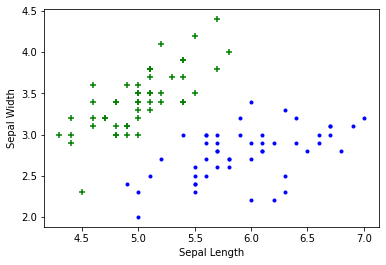

In [ ]:
plt.xlabel('Sepal Length')  
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. <br>

We will take 80% data to train the SVM, and 20% to test the model. (Additionally, you can use random_state to select records randomly.)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target','flower_name'], axis='columns')
y = df.target
# Uncomment the following to see 150 samples
#X
# Uncomment the following to see corresponding labels
#y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_size=0.2 or, 20 % of the total number of samples, i.e. 150 samples, will be considered as test data

In [ ]:
len(X_train)

120

In [ ]:
len(X_test)

30

In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
108,6.7,2.5,5.8,1.8
36,5.5,3.5,1.3,0.2
132,6.4,2.8,5.6,2.2
101,5.8,2.7,5.1,1.9
92,5.8,2.6,4.0,1.2
...,...,...,...,...
47,4.6,3.2,1.4,0.2
80,5.5,2.4,3.8,1.1
125,7.2,3.2,6.0,1.8
15,5.7,4.4,1.5,0.4


## Support Vector Classifier (SVC)

In scikit-learn, we refere **SVM** as `SVC` to denote support vector classification. The implementation is based on libsvm. <br>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
from sklearn.svm import SVC
model = SVC(C=11, decision_function_shape='ovr', gamma='auto',
    kernel='linear', max_iter= -1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

## Build SVC model
Now we are ready to pass our dataset on SVM/SVC model

In [ ]:
model.fit(X_train, y_train)

[LibSVM]

SVC(C=11, gamma='auto', kernel='linear', verbose=True)

## Evaluate the model
Let's estimate how accurately the classifier or model can predict the breast cancer of patients.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


## **  HYPER PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000],
                     'kernel': ['linear'], 'C': [1, 10, 100, 1000]}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.978 (+/-0.062) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.978 (+/-0.062) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.958 (+/-0.085) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.958 (+/-0.085) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.964 (+/-0.050) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.964 (+/-0.050) for {'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}
0.965 (+/-0.063) for {'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}
0.965 (+/-0.063) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.67      0.22      0.33

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000],
                     'kernel': ['linear'], 'C': [1, 10, 100, 1000]}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'linear', 'gamma': 0.001, 'C': 100}

Grid scores on development set:

0.970 (+/-0.075) for {'kernel': 'linear', 'gamma': 0.001, 'C': 1}
0.970 (+/-0.075) for {'kernel': 'linear', 'gamma': 0.0001, 'C': 1}
0.956 (+/-0.058) for {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
0.956 (+/-0.058) for {'kernel': 'linear', 'gamma': 0.0001, 'C': 10}
0.980 (+/-0.053) for {'kernel': 'linear', 'gamma': 0.001, 'C': 100}
0.980 (+/-0.053) for {'kernel': 'linear', 'gamma': 0.0001, 'C': 100}
0.973 (+/-0.050) for {'kernel': 'linear', 'gamma': 0.001, 'C': 1000}
0.973 (+/-0.050) for {'kernel': 'linear', 'gamma': 0.0001, 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best parameters set found on development set:

{'kernel': 'linear', 'gamma': 0.001, 'C': 100}

Grid scores on development set:

0.966 (+/-0.082) for {'kernel': 'linear', 'gamma': 0.001, 'C': 1}
0.966 (+/-0.082) for {'kernel': 'linear', 'gamma': 0.0001, 'C': 1}
0.951 (+/-0.064) for {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
0.951 (+/-0.064) for {'kernel': 'linear', 'gamma': 0.0001, 'C': 10}
0.974 (+/-0.068) for {'kernel': 'linear', 'gamma': 0.001, 'C': 100}
0.974 (+/-0.068) for {'kernel': 'linear', 'gamma': 0.0001, 'C': 100}
0.966 (+/-0.063) for {'kernel': 'linear', 'gamma': 0.001, 'C': 1000}
0.966 (+/-0.063) for {'kernel': 'linear', 'gamma': 0.0001, 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92         6
           2       1.00     

### An arbitrary sample

In [ ]:
y_pred

array([0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 2])

In [ ]:
output = model.predict(sc.transform([[5.5,2.3,4.0,1.3]]))
output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([2])

---
---
---
# A quick note on other Scikit-learn datasets
Until now, we have trained SVC() classifier on iris dataset of Scikit-learn. <br>

All built-in datasets are stored in `sklearn.datasets`. Some examples are:
 1. `load_wine`: wine classification dataset
 2. `load_breast_cancer`: breast cancer dataset
 3. `fetch_lfw_people`: Labeled face dataset
 4. and so on, please check https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets to see all built-in datasets

Standard way to call them is, `from sklearn.datasets import <DATASET_NAME>`



### Let's try breast cancer dataset.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#print(data.feature_names)
#print("\n")
#print(data.target_names)

df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()
# Add labels as a column
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df0 = df[:19]

#df0

## Train SVC classifier

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis='columns')
y = df.target
# Uncomment the following to see 150 samples
#X
#len(X)
# Uncomment the following to see corresponding labels
#y
#len(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_size=0.2 or, 20 % of the total number of samples, i.e. 150 samples, will be considered as test data

In [ ]:
from sklearn.svm import SVC
model = SVC(C=10.0, gamma='auto',kernel='linear', max_iter=-1)

In [ ]:
model.fit(X_train, y_train)

SVC(C=10.0, gamma='auto', kernel='linear')

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9824561403508771


### Precision
What proportion of positive identifications was actually correct?

**HYPER PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10],
                     'kernel': ['linear'], 'C': [1, 10]}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.941 (+/-0.033) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.941 (+/-0.033) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.942 (+/-0.037) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.942 (+/-0.037) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'gam

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.9733333333333334


### Recall
What proportion of actual positives was identified correctly?

In [ ]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9733333333333334


# Hope we have a better understading on how SVM works


---

# In the next tutorial we will give a deeper look into the SVC() function